This project aims at predicting the probability of customers switching to another phone service provider. The data is from Kaggle.com. 

Content:
 - Data cleaning
 - Exploratory Data Analysis
 - Feature engineering
 - Model building 
 - Model evaluation
 - Churn probability summary  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as po
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\rayan\Downloads\telco_customer_churn (1)\Telco_Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1. DATA CLEANING

In [3]:
#Convert string values to float in Churn Column.
df.loc[df.Churn == 'No', 'Churn'] = 0
df.loc[df.Churn == 'Yes', 'Churn'] = 1

In [4]:
#replace 'No internet service' by 'no' to uniformize values
cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in cols:
  df[i]=df[i].replace({'No internet service' : 'No'})
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [5]:
#Fill in missing values in 'Total Charges' column. Since the data is numeric and skewed, we will use the column median. 
Total_Charges_Median = df[df['TotalCharges'] !=' ']['TotalCharges'].median()
df['TotalCharges'][df['TotalCharges'] == ' '] = Total_Charges_Median

Exploratory Data Analysis

In [6]:
churn_by_gender = df.groupby([df['gender']])[['Churn']].sum().reset_index()
churn_by_gender

,gender,Churn
0,Female,939
1,Male,930


In [7]:
churn_by_contract = df.groupby([df['Contract']])[['Churn']].sum().reset_index()
churn_by_contract

,Contract,Churn
0,Month-to-month,1655
1,One year,166
2,Two year,48


In [8]:
churn_by_payment_method = df.groupby([df['PaymentMethod']])[['Churn']].sum().reset_index()
churn_by_payment_method

,PaymentMethod,Churn
0,Bank transfer (automatic),258
1,Credit card (automatic),232
2,Electronic check,1071
3,Mailed check,308


In [9]:
churn_by_internet_service = df.groupby([df['InternetService']])[['Churn']].sum().reset_index()
churn_by_internet_service

,InternetService,Churn
0,DSL,459
1,Fiber optic,1297
2,No,113


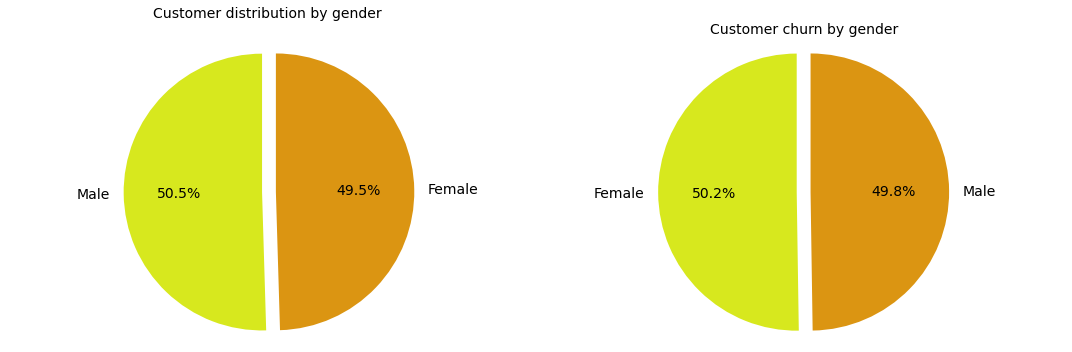

In [10]:
#Comparing gender distribution vs churn by gender 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.set_title('Customer distribution by gender \n', fontsize=14)
ax1.pie(df['gender'].value_counts(), labels=['Male', 'Female'], colors=['#d7e81e','#db9512'], autopct='%1.1f%%', 
        startangle=90, explode=[0.1,0], textprops={'fontsize': 14})
fig = plt.gcf()
ax1.axis('equal')  
plt.tight_layout()

ax2.set_title('Customer churn by gender', fontsize=14)
ax2.pie(churn_by_gender['Churn'], labels=churn_by_gender['gender'], colors=['#d7e81e','#db9512'], autopct='%1.1f%%', 
        startangle=90, explode=[0.1,0], textprops={'fontsize': 14})
fig = plt.gcf()
ax2.axis('equal')  
plt.tight_layout()

We can infer that gender has no significant impact on churn

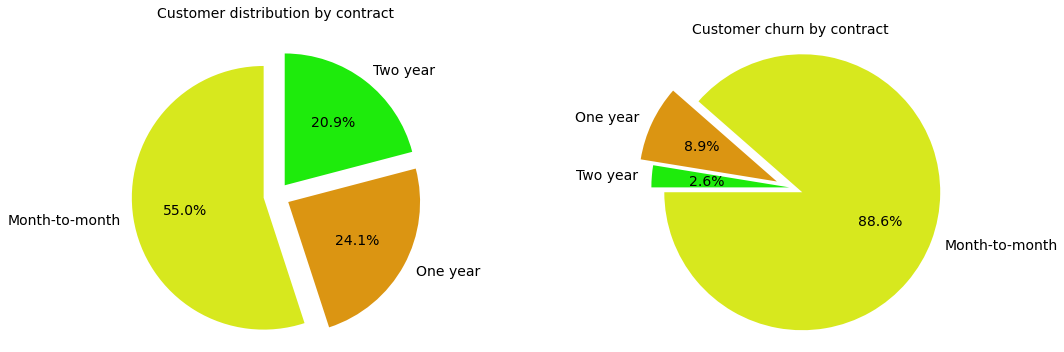

In [11]:
#Comparing customer distribution by contract type vs churn by contrcat type  

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('Customer distribution by contract \n', fontsize=14)
ax1.pie(df['Contract'].value_counts(), labels=churn_by_contract['Contract'], colors=['#d7e81e','#db9512','#1eeb0c'], autopct='%1.1f%%', 
        startangle=90, explode=[ 0.1, 0.1, 0.1],  textprops={'fontsize': 14})
fig = plt.gcf()
ax1.axis('equal')  
plt.tight_layout()

ax2.set_title('Customer churn by contract', fontsize=14)
ax2.pie(churn_by_contract['Churn'], labels=churn_by_contract['Contract'], colors=['#d7e81e','#db9512','#1eeb0c'], autopct='%1.1f%%', 
        startangle=180, explode=[0.1,0.1,0], textprops={'fontsize': 14})
fig = plt.gcf()
ax2.axis('equal')  
plt.tight_layout()

We can infer that the shorter the contract, the most likely a customer is to churn. 

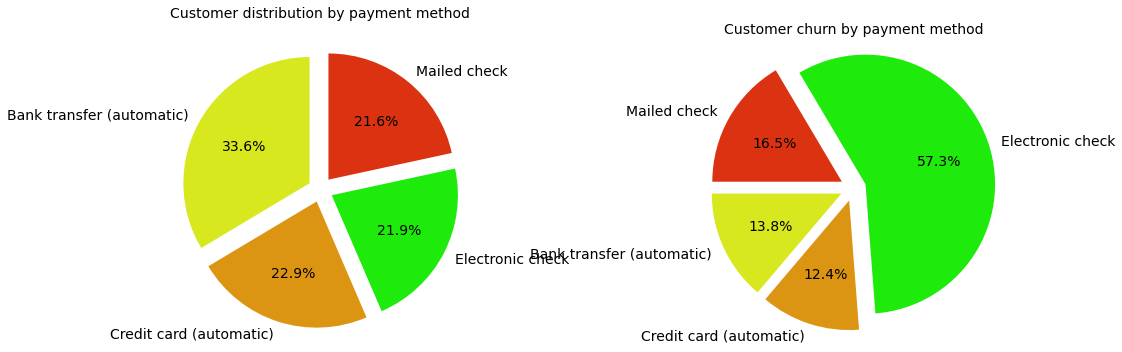

In [12]:
#Comparing customer distribution by payment method vs churn by payment method

fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('Customer distribution by payment method \n', fontsize=14)
ax1.pie(df['PaymentMethod'].value_counts(), labels=churn_by_payment_method['PaymentMethod'], colors=['#d7e81e','#db9512','#1eeb0c','#db3312'], autopct='%1.1f%%', 
        startangle=90, explode=[0.1,0.1,0.1,0.1], textprops={'fontsize': 14})
fig = plt.gcf()
ax1.axis('equal')  
plt.tight_layout()

ax2.set_title('Customer churn by payment method', fontsize=14)
ax2.pie(churn_by_payment_method['Churn'], labels=churn_by_payment_method['PaymentMethod'], colors=['#d7e81e','#db9512','#1eeb0c','#db3312'], 
        autopct='%1.1f%%', startangle=180, explode=[0.1, 0.1, 0.1, 0.1], textprops={'fontsize': 14})
fig = plt.gcf()
ax2.axis('equal')  
plt.tight_layout()

Customers who opted for automatic payments are less likely to churn. Customers paying with electronic checks are disproportinately more likely to churn. 

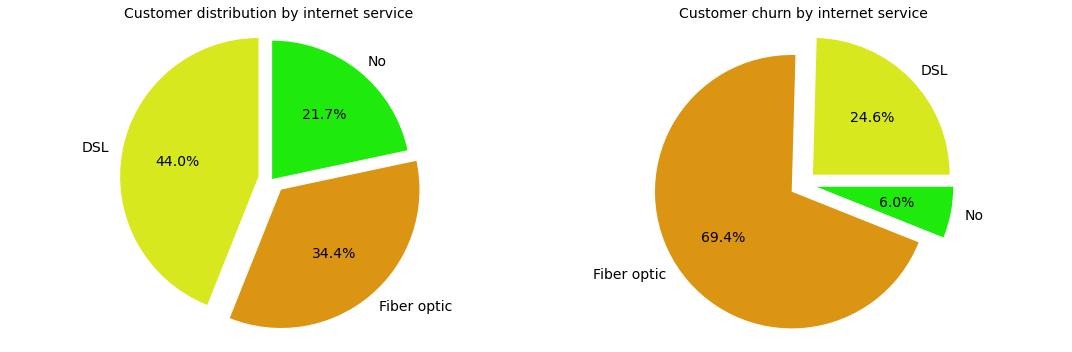

In [13]:
#Comparing customer distribution by internet service vs churn by internet service

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('Customer distribution by internet service', fontsize=14)
ax1.pie(df['InternetService'].value_counts(), labels=churn_by_internet_service['InternetService'], colors=['#d7e81e','#db9512','#1eeb0c'], autopct='%1.1f%%', 
        startangle=90, explode=[0.1,0.1,0], textprops={'fontsize': 14})
fig = plt.gcf()
ax1.axis('equal')  
plt.tight_layout()

ax2.set_title('Customer churn by internet service', fontsize=14)
ax2.pie(churn_by_internet_service['Churn'], labels=churn_by_internet_service['InternetService'], colors=['#d7e81e','#db9512','#1eeb0c'], 
        autopct='%1.1f%%', startangle=0, explode=[ 0.1, 0.1, 0.1], textprops={'fontsize': 14})
fig = plt.gcf()
ax2.axis('equal')  
plt.tight_layout()

Customers who signed up for fiber optic are more likely to churn than those who signed up for DSL. Customers who did not sign up for internet service are more likely to remain clients. 

Feature engineering

In [14]:
#Split columns by data type 

categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
               'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
               'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [15]:
#Assign data type to columns groups

for col in categorical:
  df[col] = pd.Categorical(df[col])

for col in numerical:
  df[col] = df[col].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float64 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [17]:
#Using dummies to turn categorical data into binary values. 

df=pd.get_dummies(df, columns = categorical, drop_first = True)
df.head() 

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1.0,29.85,29.85,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34.0,56.95,1889.50,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2.0,53.85,108.15,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,45.0,42.30,1840.75,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,9237-HQITU,2.0,70.70,151.65,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [18]:
#Data normalization on numerical values 

standardScaler = StandardScaler()
df[numerical] = standardScaler.fit_transform(df[numerical])
df.head() 

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,-1.277445,-1.160323,-0.994242,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0.066327,-0.259629,-0.173244,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,-1.236724,-0.362660,-0.959674,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0.514251,-0.746535,-0.194766,0,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,9237-HQITU,-1.236724,0.197365,-0.940470,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [19]:
#create independant feature x and target y

y = df['Churn'].astype(int)
X = df.drop(['Churn','customerID'], axis = 1)

In [20]:
#Split the data into training set (70%) and test set (30%).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 50)

Model building

In [21]:
#Logistic Regression Model

logistic_model = LogisticRegression(random_state = 50)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=50)

In [22]:
#Predict 
logistic_pred = logistic_model.predict(X_test)

#Find accuracy
logistic_accuracy = round(metrics.accuracy_score(y_test, logistic_pred) * 100, 2)

In [23]:
#Support Vector Machine Model
svc_model = SVC(kernel = 'linear', random_state = 50, probability = True)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=50)

In [24]:
#Predict
svc_pred = svc_model.predict(X_test)

#Find accuracy 
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)

In [25]:
#K-Nearest Neighbour Model

knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # p=2 represents Euclidean distance
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
#Predict
knn_pred = knn_model.predict(X_test)

#Find accuracy 
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)

In [27]:
#Decision Tree Classification Model
 
dt_model = DecisionTreeClassifier(criterion ='gini', random_state = 50)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=50)

In [28]:
#Predict 
dt_pred = dt_model.predict(X_test)

#Find accuracy 
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)

In [29]:
#Random Forest Classification Model
rf_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [30]:
#Predict 
rf_pred = rf_model.predict(X_test)

#Find accuracy 
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)

Model evaluation

In [31]:
#Create table displaying each model and its precision

model_summary = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
               'Decision Tree', 'Random Forest'],
    'Score' : [logistic_accuracy, svc_accuracy, knn_accuracy, dt_accuracy, rf_accuracy]})


In [32]:
model_summary_df = model_summary.sort_values(by = 'Score', ascending = False)
model_summary_df

,Model,Score
0,Logistic Regression,80.03
1,Support Vector Machine,79.37
4,Random Forest,78.75
2,K-Nearest Neighbor,76.38
3,Decision Tree,72.36


Churn probability summary

In [33]:
#Predict the probability of churn for each ID

df['Probability_of_churn'] = logistic_model.predict_proba(df[X_test.columns])[:,1]

In [34]:
#Create a table to display the probability of churn for each ID

probability_of_churn = df[['customerID','Probability_of_churn']]
probability_of_churn = probability_of_churn.sort_values(by = 'Probability_of_churn', ascending = False)
probability_of_churn.reset_index(drop=True, inplace=True)
probability_of_churn

,customerID,Probability_of_churn
0,9300-AGZNL,0.858968
1,9497-QCMMS,0.857875
2,5150-ITWWB,0.855156
3,4424-TKOPW,0.855080
4,2720-WGKHP,0.854948
...,...,...
7038,4086-WITJG,0.001294
7039,3173-WSSUE,0.001269
7040,1052-QJIBV,0.001268
7041,2848-YXSMW,0.001236
